In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit 
import pandas as pd 
from tqdm import tqdm 
from scipy.signal import find_peaks
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter
from scipy import signal

import scienceplots
plt.style.use(['science', 'notebook'])
plt.rcParams['font.family'] = 'Times New Roman'
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [3]:
folder_path = 'data\\filter_csv_files'


csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dfs = {}

for file_name in csv_files:
    
    name = os.path.splitext(file_name)[0]
    df = pd.read_csv(os.path.join(folder_path, file_name), skiprows= 47) 
    dfs[name] = df

dfs

{'filter_1':                    [Data]
 1.965185852e+02  0.000041
 1.967180328e+02 -0.001734
 1.969174957e+02  0.000992
 1.971169891e+02 -0.001091
 1.973164825e+02 -0.000602
 ...                   ...
 1.013664001e+03 -0.000319
 1.013905090e+03  0.000632
 1.014146179e+03  0.000581
 1.014387329e+03  0.000298
 [EndOfFile]           NaN
 
 [3649 rows x 1 columns],
 'filter_2':                    [Data]
 1.965185852e+02 -0.000887
 1.967180328e+02 -0.001556
 1.969174957e+02 -0.000604
 1.971169891e+02 -0.001016
 1.973164825e+02  0.000270
 ...                   ...
 1.013664001e+03 -0.000013
 1.013905090e+03  0.000810
 1.014146179e+03 -0.000424
 1.014387329e+03 -0.000039
 [EndOfFile]           NaN
 
 [3649 rows x 1 columns],
 'filter_3':                    [Data]
 1.965185852e+02  0.001136
 1.967180328e+02  0.000467
 1.969174957e+02 -0.000613
 1.971169891e+02 -0.000047
 1.973164825e+02  0.000364
 ...                   ...
 1.013664001e+03 -0.000664
 1.013905090e+03 -0.000484
 1.014146179e+03 

In [4]:

def filter_me_daddy(y,  step_size = 10,  cutoff_freq  = 5 , sampling_freq = 100):
    nyquist_freq = 0.5 * sampling_freq
    normalized_cutoff_freq = cutoff_freq / nyquist_freq
    b, a = signal.butter(4, normalized_cutoff_freq, 'low')
    filtered_data = signal.filtfilt(b, a, y)
    return filtered_data/max(filtered_data)

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / stddev)**2 / 2)




def estimate_my_peaks(wavelengths, signal_amplitudes , peak_threshold = 0.7):
    """returns the index of the peaks"""
    peaks,_ = find_peaks(signal_amplitudes, peak_threshold)
    wavelength_est = wavelengths[peaks[0]]
    amplitude_est = signal_amplitudes[peaks[0]]
    return wavelength_est, amplitude_est


def find_my_peaks_father(x_data, y_data, error = False):
    
    mean_w_est, amp_est = estimate_my_peaks(x_data, y_data)
    initial_guess = [amp_est, mean_w_est, 0.2]
    params, covariance = curve_fit(gaussian, x_data, y_data, p0=initial_guess)
    
    if error  == True:
        return params, covariance
    else:
        return params

100%|██████████| 5/5 [00:00<00:00, 100.76it/s]


Filter_1
Filter_2
Filter_3
Filter_4
Filter_5


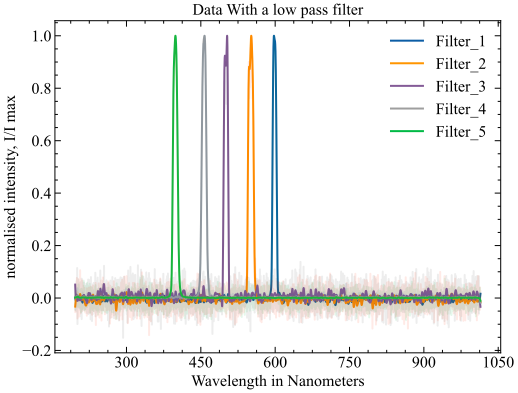

In [5]:
plt.figure()
plt.title('Data With a low pass filter')

for name, df in tqdm(dfs.items()):
    name = name[0].upper() + name[1:]
    print(name)
    x  = np.array([float(values) for values in df.index[:-2] ])
    y = np.array([float(values) for values in df.values[:-2] ])
    y = y/max(y)
    
    
    filtered_data = filter_me_daddy(y)
    
    # mean_estimator in action 
#     mean,amp =  estimate_my_peaks(x, filtered_data)
#     plt.plot(mean, amp, 'x')
    
    plt.plot(x, filtered_data, label = '{name}'.format(name = name) )
    plt.plot(x, y, alpha = 0.1) #label = '{name}'.format(name = name), alpha = 0.2)
        

formatter = ScalarFormatter(useMathText=True)
# formatter.set_powerlimits((3, 3))
plt.xlabel('Wavelength in Nanometers')
plt.ylabel('normalised intensity, I/I max')
plt.gca().xaxis.set_major_locator(MultipleLocator(150))
plt.gca().xaxis.set_major_formatter(formatter)


plt.legend()
plt.show()

[  1.09729715 598.68993676   3.17365999]


0.010799515180529014


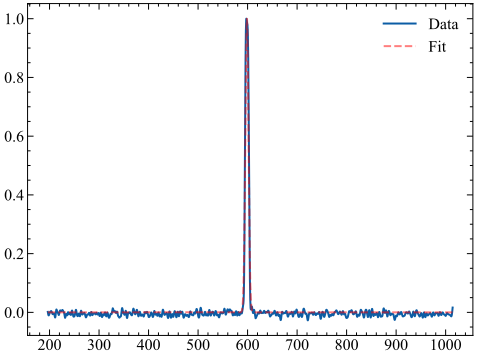

In [6]:
filter_2 = dfs['filter_1']    # change 1 to 5
test_x = np.array([float(values) for values in filter_2.index[:-2] ])
test_y = np.array([float(values) for values in filter_2.values[:-2] ])


test_y = test_y/max(test_y)

filte_y = filter_me_daddy(test_y)



params, cov = find_my_peaks_father(test_x, filte_y, error = True)
print(params)
print('\n')
print(np.sqrt(cov[1,1]) )


plt.plot(test_x, filte_y, label='Data')
plt.plot(test_x, gaussian(test_x, 1, params[1], params[2]), color='red', label='Fit', alpha = 0.5, linestyle = 'dashed')
plt.legend()
plt.show()

Filter 1 598.689936761608 0.010799495624534134
Filter 2 551.0005441838206 0.019220127550053336
Filter 3 500.6467022071501 0.020644814024067173
Filter 4 456.54469875986797 0.00740376664456644
Filter 5 398.4735914942049 0.008469660566119164


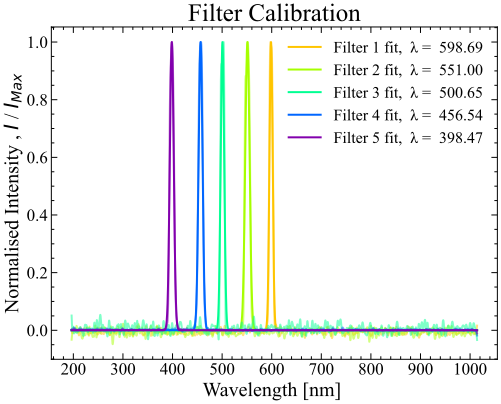

In [8]:
filter_colors = {
    'filter_1': (255, 197, 0),   # Red
    'filter_2': (166, 255, 0),   # Green
    'filter_3': (0, 255, 146),
    'filter_4': (0, 102, 255),
    'filter_5': (130, 0, 173)   # Blue
    # Add more filter names and RGB values as needed
}



plt.figure()
plt.title('Filter Calibration', fontsize = 25)
for name, df in dfs.items():
    color=np.array(filter_colors.get(name)) / 255
    name = name.title()
    name = name.replace('_', ' ')
    wavelengths  = np.array([float(values) for values in df.index[:-2] ])
    amplitudes = np.array([float(values) for values in df.values[:-2] ])
    amplitudes = amplitudes/max(amplitudes)
    
    signal_filtered = filter_me_daddy(amplitudes)
    parameters, covariance_mat  = find_my_peaks_father(wavelengths, signal_filtered, error = True)
    
    plt.plot(wavelengths, signal_filtered, color = color,alpha = 0.5)
    plt.plot(wavelengths, gaussian(wavelengths, 1, parameters[1], parameters[2]), 
             label = '{filter_name} fit,  λ = {mean: .2f}'.format(filter_name=name, mean=parameters[1]),
               color = color )
    plt.legend()
    print(name, parameters[1], np.sqrt(covariance_mat[2,2]) )
plt.ylabel('Normalised Intensity , $I$ / $I_{Max}$', fontsize = 20)
plt.xlabel('Wavelength [nm] ', fontsize = 20)
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.show()    